<a href="https://colab.research.google.com/github/auviera/assignment/blob/main/Pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [8]:
ls

CNN_11.ipynb  dataset@  GMB_05_test.jpg  nnmodel_dataset/  Untitled0.ipynb


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import os

In [4]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")

data = []
labels = []

[INFO] loading images...


In [5]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
  
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 128, 128, 3)
(352, 128, 128, 3)


In [18]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

#fully connected layer
model1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model1.add(Dense(100))
model1.add(Activation('relu'))
model1.add(Dropout(0.7))
model1.add(Dense(12))
model1.add(Activation('softmax'))


model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [19]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [20]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, batch_size=32)

Epoch 1/40
33/33 [==============================] - 20s 591ms/step - loss: 2.5059 - accuracy: 0.0777 - val_loss: 2.4729 - val_accuracy: 0.1108
Epoch 2/40
33/33 [==============================] - 20s 599ms/step - loss: 2.4331 - accuracy: 0.1327 - val_loss: 2.3492 - val_accuracy: 0.2017
Epoch 3/40
33/33 [==============================] - 20s 598ms/step - loss: 2.3099 - accuracy: 0.1829 - val_loss: 2.2323 - val_accuracy: 0.2557
Epoch 4/40
33/33 [==============================] - 21s 631ms/step - loss: 2.1798 - accuracy: 0.2389 - val_loss: 2.0802 - val_accuracy: 0.3608
Epoch 5/40
33/33 [==============================] - 20s 601ms/step - loss: 2.0315 - accuracy: 0.3024 - val_loss: 1.8743 - val_accuracy: 0.3892
Epoch 6/40
33/33 [==============================] - 20s 598ms/step - loss: 1.9749 - accuracy: 0.3118 - val_loss: 1.8442 - val_accuracy: 0.4233
Epoch 7/40
33/33 [==============================] - 20s 605ms/step - loss: 1.8413 - accuracy: 0.3545 - val_loss: 1.6631 - val_accuracy: 0.4659

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


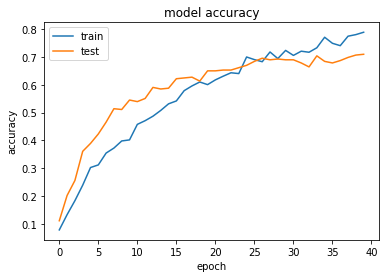

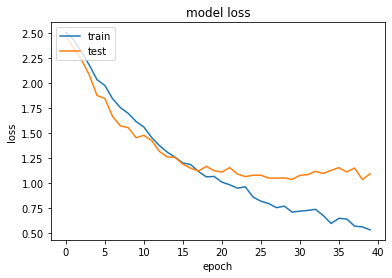

In [21]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.65      0.67      0.66        30
      GMB_02       0.69      0.58      0.63        31
      GMB_03       0.85      0.63      0.72        35
      GMB_04       0.60      0.72      0.65        25
      GMB_05       0.59      0.84      0.69        31
      GMB_06       0.67      0.60      0.63        30
      GMB_07       0.75      0.70      0.72        30
      GMB_08       0.74      0.83      0.78        24
      GMB_09       0.93      0.83      0.88        30
      GMB_10       0.66      0.76      0.70        25
      GMB_11       0.65      0.58      0.61        38
      nonGMB       0.91      0.91      0.91        23

    accuracy                           0.71       352
   macro avg       0.72      0.72      0.72       352
weighted avg       0.72      0.71      0.71       352



In [24]:
model1.save('nnmodel_dataset')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_dataset/assets


In [25]:
import cv2
import matplotlib.pyplot as plt
image1='GMB_05_test.jpg'

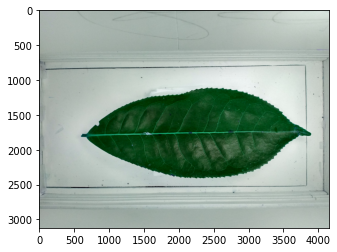

In [26]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [27]:
image_testing = Image.open('GMB_05_test.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [28]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [29]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.70047463e-06 4.07839593e-07 2.54767429e-09 2.97666906e-04
  9.82209086e-01 8.50581710e-05 4.55366075e-03 4.53504217e-05
  1.18168446e-05 1.41032063e-03 1.13708656e-02 1.39678805e-05]]
['GMB_05']
